In [40]:
%matplotlib inline

# Introduction

Topic: We will collect I-V data of three LED (Red, Green, Blue)

![Prototype](../extra/img/red-green-blue-led-iv.jpg)

# Connection

![Breadboard](../extra/img/fritzing/red-green-blue-led-iv-curve_bb.png)
![Schematic](../extra/img/fritzing/red-green-blue-led-iv-curve_schem.png)

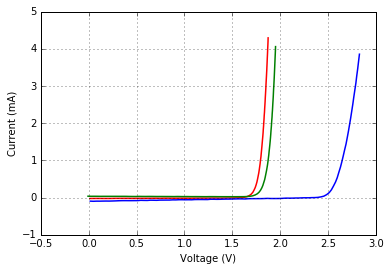

In [42]:
import box0
import numpy as np
import matplotlib.pyplot as plt

# allocate the appropriate resources
dev = box0.usb.open_supported()
ain0 = dev.ain()
aout0 = dev.aout()

# prepare AIN0
ain0.snapshot_prepare()
ain0.chan_seq_set([0, 1, 2, 3])
ain0.bitsize_speed_set(12, 100000)

# prepare AOUT0
aout0.snapshot_prepare()

# generate voltage, read voltage, calculate current and store the result
# AIN0.CH0 = Voltage across Red led
# AIN0.CH1 = Voltage across Green led
# AIN0.CH2 = Voltage across Blue led
# AIN0.CH3 = AOUT0.CH0 = generated signal
# current across LED  = (AIN0.CH3 - AIN0.CHi) / Ri

SAMPLES = 100

red_res = 330.0
red_x = np.empty(SAMPLES)
red_y = np.empty(SAMPLES)

green_res = 330.0
green_x = np.empty(SAMPLES)
green_y = np.empty(SAMPLES)

blue_res = 120.0
blue_x = np.empty(SAMPLES)
blue_y = np.empty(SAMPLES)

voltages = np.linspace(0.0, 3.3, SAMPLES)
aout0_running = False

for i in range(SAMPLES):
    if aout0_running:
        aout0.snapshot_stop()
    
    # output "v" value on AOUT0.CH0
    aout0.snapshot_start(voltages[i:(i+1)])
    aout0_running = True
    
    # read back AIN0.CH0 and AIN0.CH1
    readed_data = np.empty(1000)
    ain0.snapshot_start(readed_data)
    
    # do the calculation
    ch0 = np.mean(readed_data[0::4])
    ch1 = np.mean(readed_data[1::4])
    ch2 = np.mean(readed_data[2::4])
    ch3 = np.mean(readed_data[3::4])
    
    # store the result
    red_x[i] = ch0
    red_y[i] = (ch3 - ch0) / red_res
    green_x[i] = ch1
    green_y[i] = (ch3 - ch1) / green_res
    blue_x[i] = ch2
    blue_y[i] = (ch3 - ch2) / blue_res
    
# stop if AOUT0 running
if aout0_running:
    aout0.snapshot_stop()

# close the resources
ain0.close()
aout0.close()
dev.close()

# A to mA
red_y *= 1000.0
green_y *= 1000.0
blue_y *= 1000.0

# now, plot the data
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.grid(True)
plt.plot(red_x, red_y, 'r-', green_x, green_y, 'g-', blue_x, blue_y, 'b-', linewidth=1.5)
plt.show()

TODO
- do caliberation (the graph is showing Uncaliberated Result, current decrease as voltage increase till knee point)